In [1]:
import awkward as ak
import numba
import numpy as np
import pandas as pd
import awkward as ak
import vector
vector.register_numba()
vector.register_awkward()

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
hep.style.use(hep.style.ROOT)

In [2]:
df = ak.from_parquet("/eos/user/d/dvalsecc/www/ttHbbAnalysis/training_dataset/all_jets_v6.parquet")

In [3]:
df

<Array [{jets: [{pt: 68.3, ... m: 0}}] type='584143 * {"jets": var * {"pt": floa...'>

In [4]:
(jets,
partons_matched,
partons,
generator_info,
lepton_partons,
lepton_reco, 
met
) = ak.unzip(df)
jets = ak.with_name(jets, name="Momentum4D")
partons_matched = ak.with_name(partons_matched, name="Momentum4D")
partons = ak.with_name(partons, name="Momentum4D")
lepton_partons = ak.with_name(lepton_partons, name="Momentum4D")
lepton_reco = ak.with_name(lepton_reco, name="Momentum4D")
met = ak.with_name(met, name="Momentum4D")

In [11]:
lepton_reco[0:10].tolist()

[{'pt': 53.691837310791016,
  'eta': 1.665283203125,
  'phi': 2.4091796875,
  'm': 0.0},
 {'pt': 96.12625885009766,
  'eta': 1.142822265625,
  'phi': -2.4541015625,
  'm': 0.0},
 {'pt': 93.13304901123047,
  'eta': -1.093994140625,
  'phi': 0.7091064453125,
  'm': 0.0},
 {'pt': 51.354347229003906,
  'eta': -0.169403076171875,
  'phi': 2.12744140625,
  'm': 0.0},
 {'pt': 40.06182098388672,
  'eta': 1.2939453125,
  'phi': 1.721923828125,
  'm': 0.0},
 {'pt': 64.29206848144531,
  'eta': 1.630615234375,
  'phi': 1.982421875,
  'm': 0.0},
 {'pt': 30.57619285583496,
  'eta': -0.38641357421875,
  'phi': -2.05224609375,
  'm': 0.0},
 {'pt': 282.02618408203125,
  'eta': 0.146331787109375,
  'phi': -0.260009765625,
  'm': 0.0},
 {'pt': 33.305484771728516,
  'eta': 1.1220703125,
  'phi': 2.01025390625,
  'm': 0.0},
 {'pt': 112.91278839111328,
  'eta': -0.9715576171875,
  'phi': 2.03515625,
  'm': 0.0}]

In [4]:
jets, parton = ak.unzip(df)

In [5]:
jets

<Array [[{pt: 68.3, eta: 0.853, ... prov: -1}]] type='584143 * var * {"pt": floa...'>

In [6]:
jets

<Array [[{pt: 68.3, eta: 0.853, ... prov: -1}]] type='584143 * var * {"pt": floa...'>

In [7]:
jets.ndim

2

In [9]:
jets[0].tolist()

[{'pt': 68.3125,
  'eta': 0.8526611328125,
  'phi': 2.255859375,
  'btag': 0.9951171875,
  'm': 0.0,
  'matched': True,
  'prov': 2.0},
 {'pt': 58.03125,
  'eta': 1.462158203125,
  'phi': -0.42449951171875,
  'btag': 0.732421875,
  'm': 0.0,
  'matched': True,
  'prov': 3.0},
 {'pt': 40.4375,
  'eta': 1.4453125,
  'phi': -1.45703125,
  'btag': 0.0792236328125,
  'm': 0.0,
  'matched': False,
  'prov': -1.0},
 {'pt': 30.71875,
  'eta': 0.04489898681640625,
  'phi': 0.5386962890625,
  'btag': 0.49560546875,
  'm': 0.0,
  'matched': True,
  'prov': 4.0},
 {'pt': 30.421875,
  'eta': 2.32421875,
  'phi': 0.33026123046875,
  'btag': 0.04327392578125,
  'm': 0.0,
  'matched': True,
  'prov': 5.0}]

In [13]:
num_jets = ak.num(jets, axis=1)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 9.88080e+04, 1.87139e+05,
        1.62798e+05, 8.54920e+04, 3.41090e+04, 1.13450e+04, 3.34400e+03,
        8.43000e+02, 2.09000e+02, 4.50000e+01, 1.10000e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15.]),
 <BarContainer object of 14 artists>)

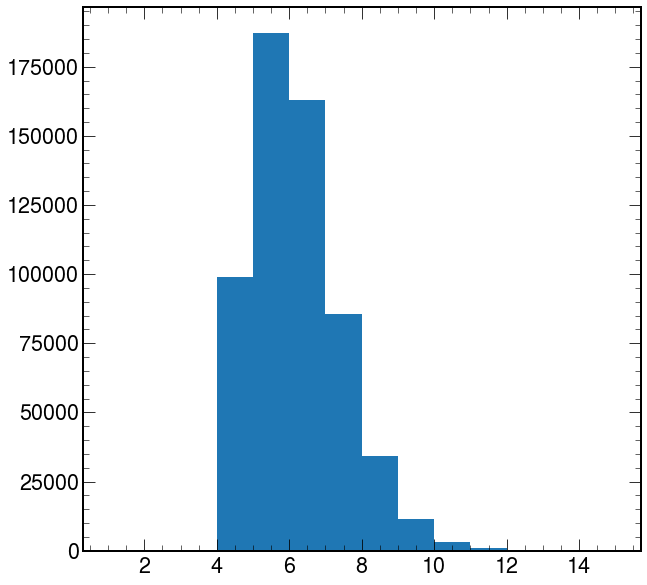

In [14]:
plt.hist(num_jets, bins=14, range=(1, 15))

In [21]:
jets[jets.pt > 70].eta[0:100].tolist()

[[],
 [1.500244140625, 2.365234375, 1.673828125, 1.1171875, 2.15576171875],
 [-0.712890625],
 [1.8056640625, 1.30126953125],
 [1.484130859375, 2.0556640625],
 [2.27099609375, 0.3822021484375],
 [-0.175445556640625, 0.211700439453125, -0.03710174560546875],
 [1.14404296875, 0.3072509765625, -0.6270751953125, -0.115386962890625],
 [0.023204803466796875, 0.6318359375],
 [-1.1396484375, -0.648193359375, -0.0662078857421875],
 [0.35699462890625, 1.723876953125, 0.32757568359375, 2.0361328125],
 [-1.5029296875,
  1.221923828125,
  -1.727783203125,
  0.6551513671875,
  -0.42755126953125],
 [0.7772216796875, 1.157470703125],
 [1.04638671875,
  -0.5164794921875,
  -0.381591796875,
  -0.982177734375,
  0.37841796875],
 [-0.212066650390625],
 [-0.93505859375],
 [0.29254150390625, 0.5870361328125],
 [0.006534576416015625, -2.07666015625, -0.703125, 1.84716796875],
 [-0.8514404296875, -0.891357421875, 0.5572509765625],
 [0.3411865234375],
 [0.9561767578125, 1.62890625],
 [0.38836669921875, 0.800170

(array([ 5274.,  5660.,  5823.,  6379.,  7107.,  7544.,  7962.,  8410.,
         9091., 10156., 10725., 11598., 12224., 13543., 14277., 15552.,
        16647., 17661., 17845., 18795., 20339., 20624., 20373., 21553.,
        23383., 24724., 26154., 27091., 27806., 28996., 30010., 31018.,
        32753., 33125., 34298., 35056., 35503., 36473., 37033., 37856.,
        38236., 38309., 39344., 39822., 39934., 40531., 40462., 40840.,
        40563., 40545., 40768., 40909., 40665., 40005., 40134., 40151.,
        39461., 38848., 38430., 37978., 37579., 36829., 35857., 35166.,
        34474., 33808., 32703., 32000., 30422., 29271., 28671., 27512.,
        26188., 25366., 24389., 22802., 21437., 20004., 20098., 19720.,
        18390., 17827., 17576., 16312., 15114., 13897., 13175., 11977.,
        11273., 10721., 10036.,  9119.,  8433.,  8050.,  7320.,  6968.,
         6497.,  6017.,  5549.,  5241.]),
 array([-2.3999023 , -2.3519044 , -2.3039062 , -2.2559083 , -2.20791   ,
        -2.159912  , 

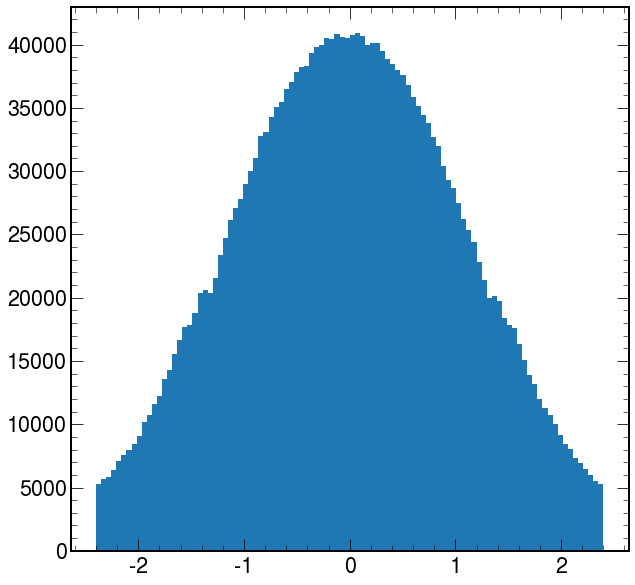

In [15]:
plt.hist(ak.flatten(jets[jets.pt > 50].eta), bins=100)

- Plot the pt of all the jets with eta < 1.5
- Count the number of jets per events with pt > 60
- Get the jets with eta > 1.5 and pt > 30 and plot their number (by event)
- Take the jets with provenance = 1 and plot their pt
- Plot the jet pt of the matched jets
- Plot the jet pt of not matched jets
- plot the number of matched jets 
- Plot the number of not matched jets
- two a 2D histogram plot of the pt of the first and second jet

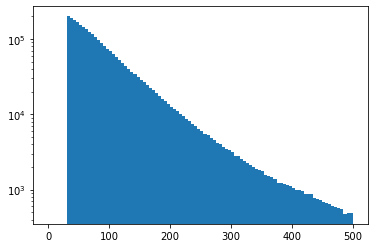

In [27]:
# Plot the pt of all the jets with eta < 1.5
plt.hist(ak.flatten(jets[abs(jets.eta) < 1.5].pt), bins=100, range=(0,500))
plt.yscale('log')
plt.show()

In [35]:
# Count the number of jets per events with pt > 60
ak.num(jets[jets.pt > 60])[0:25].tolist()

[1, 5, 1, 2, 3, 4, 3, 5, 2, 4, 4, 5, 3, 5, 1, 1, 2, 5, 3, 3, 2, 3, 3, 5, 2]

(array([4.22052e+05, 1.04985e+05, 4.17320e+04, 1.22830e+04, 2.64600e+03,
        4.06000e+02, 3.70000e+01, 2.00000e+00, 0.00000e+00]),
 array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
         5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ]),
 <BarContainer object of 9 artists>)

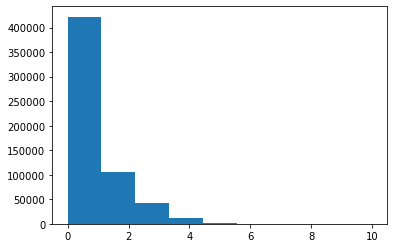

In [199]:
# Get the jets with eta > 1.5 and pt > 30 and plot their number (by event)
eta_jets = jets[abs(jets.eta) > 1.5]
plt.hist(ak.num(jets[eta_jets.pt > 30]), bins=9, range=(0,10))

In [59]:
# Take the jets with provenance = 1 and plot their pt
ak.flatten(jets[jets.prov == 1].pt)[0:10].tolist()

[126.0,
 42.5625,
 50.125,
 57.96875,
 50.125,
 57.5625,
 75.1875,
 590.5,
 62.53125,
 205.75]

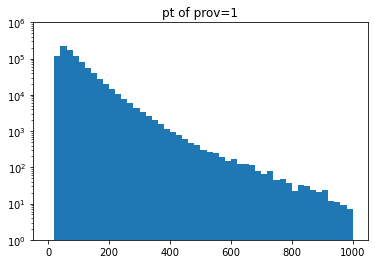

In [181]:
plt.hist(ak.flatten(jets[jets.prov == 1].pt), bins=50, range=(0,1000))
plt.yscale("log")
plt.ylim(1,10**6)
plt.title("pt of prov=1")
plt.show()

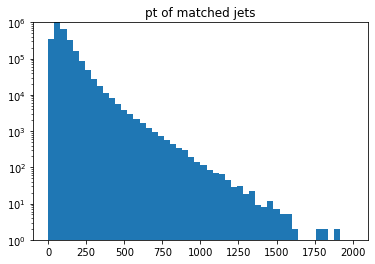

In [200]:
# Plot the jet pt of the matched jets
plt.hist(ak.flatten(jets[jets.matched == True].pt), bins=50, range=(0,2000))
plt.yscale("log")
plt.ylim(1,10**6)
plt.title("pt of matched jets")
plt.show()

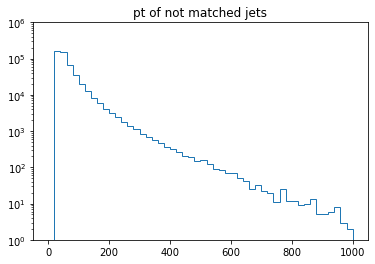

In [202]:
# Plot the jet pt of the not matched jets
plt.hist(ak.flatten(jets[jets.matched == False].pt), bins=50, range=(0,1000), histtype="step")
plt.yscale("log")
plt.ylim(1,10**6)
plt.title("pt of not matched jets")
plt.show()

- Plot the pt of matched and not matched jets on the same histogram 
trick: histt

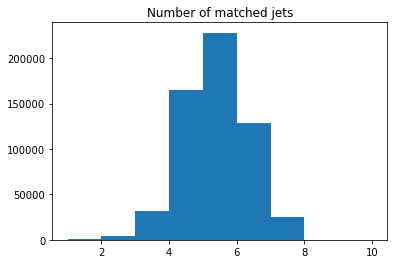

In [204]:
# Plot the number of matched jets 
plt.hist(ak.num(jets[jets.matched == True]), bins=9, range=(1,10))
plt.title("Number of matched jets")
plt.show()

In [ ]:
plot the pt of the first matched jet, second matched jets 

In [286]:
jets[jets.matched == True][0:3].tolist()

[[{'pt': 68.3125,
   'eta': 0.8526611328125,
   'phi': 2.255859375,
   'btag': 0.9951171875,
   'm': 0.0,
   'matched': True,
   'prov': 2.0},
  {'pt': 58.03125,
   'eta': 1.462158203125,
   'phi': -0.42449951171875,
   'btag': 0.732421875,
   'm': 0.0,
   'matched': True,
   'prov': 3.0},
  {'pt': 30.71875,
   'eta': 0.04489898681640625,
   'phi': 0.5386962890625,
   'btag': 0.49560546875,
   'm': 0.0,
   'matched': True,
   'prov': 4.0},
  {'pt': 30.421875,
   'eta': 2.32421875,
   'phi': 0.33026123046875,
   'btag': 0.04327392578125,
   'm': 0.0,
   'matched': True,
   'prov': 5.0}],
 [{'pt': 141.5,
   'eta': 1.500244140625,
   'phi': 1.181396484375,
   'btag': 0.006282806396484375,
   'm': 0.0,
   'matched': True,
   'prov': 5.0},
  {'pt': 126.0,
   'eta': 2.365234375,
   'phi': -2.8564453125,
   'btag': 0.99609375,
   'm': 0.0,
   'matched': True,
   'prov': 1.0},
  {'pt': 123.8125,
   'eta': 1.673828125,
   'phi': 0.4423828125,
   'btag': 0.006175994873046875,
   'm': 0.0,
   'ma

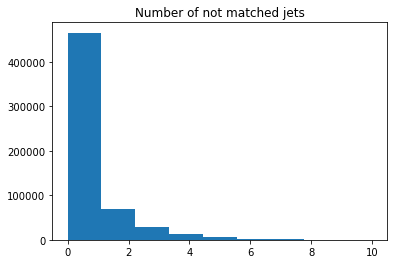

In [81]:
# Plot the number of not matched jets
plt.hist(ak.num(jets[jets.matched == False]), bins=9, range=(0,10))
plt.title("Number of not matched jets")
plt.show()

(exptext: Custom Text(0.0, 1, 'CMS'),
 expsuffix: Custom Text(0.0, 1.005, 'Simulation'))

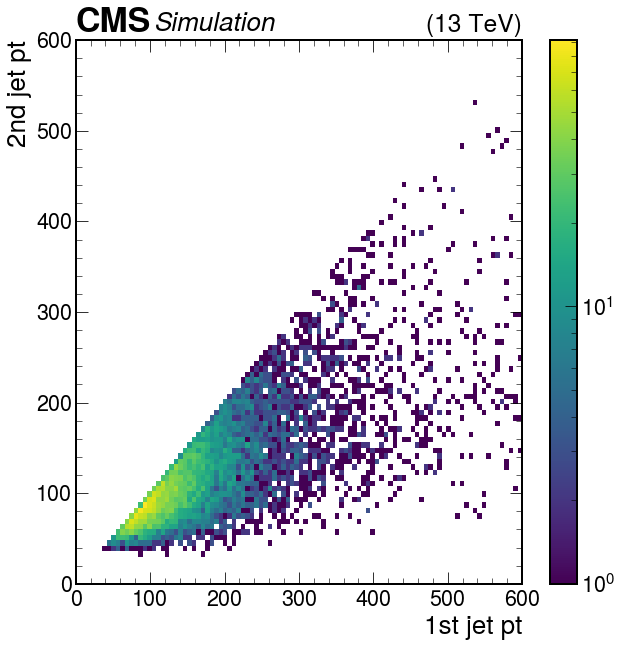

In [212]:
# 2D histogram plot of the pt of the first and second jet
first_pt = jets[0:,0].pt
second_pt = jets[0:,1].pt
plt.hist2d(first_jet_pt, second_jet_pt, bins=100, range=([[0, 600], [0, 600]]),
          norm=LogNorm())
plt.xlabel("1st jet pt")
plt.ylabel("2nd jet pt")
plt.colorbar()
hep.cms.label()

In [217]:
parton[2].tolist()

[{'pt': 30.5654296875,
  'eta': -2.6365966796875,
  'phi': -0.20660400390625,
  'pdgId': 21.0,
  'prov': 4.0},
 {'pt': 185.1875,
  'eta': -0.76263427734375,
  'phi': -2.1190185546875,
  'pdgId': 5.0,
  'prov': 2.0},
 {'pt': 58.9609375,
  'eta': -0.4866485595703125,
  'phi': 2.1634521484375,
  'pdgId': -5.0,
  'prov': 3.0},
 {'pt': 14.68701171875,
  'eta': -1.88958740234375,
  'phi': -0.695831298828125,
  'pdgId': -3.0,
  'prov': 5.0},
 {'pt': 69.6484375,
  'eta': -0.4850616455078125,
  'phi': 3.0626220703125,
  'pdgId': 4.0,
  'prov': 5.0},
 {'pt': 52.5,
  'eta': -1.71484375,
  'phi': 0.16015625,
  'pdgId': 5.0,
  'prov': 1.0},
 {'pt': 31.5625,
  'eta': 0.677734375,
  'phi': 0.7109375,
  'pdgId': -5.0,
  'prov': 1.0}]

- analyze the smallest pt of matched jets in different categories of number of jets matched

In [16]:
jets[jets.matched == True][0:3,-1].pt

<Array [30.4, 42.6, 37.7] type='3 * float32'>

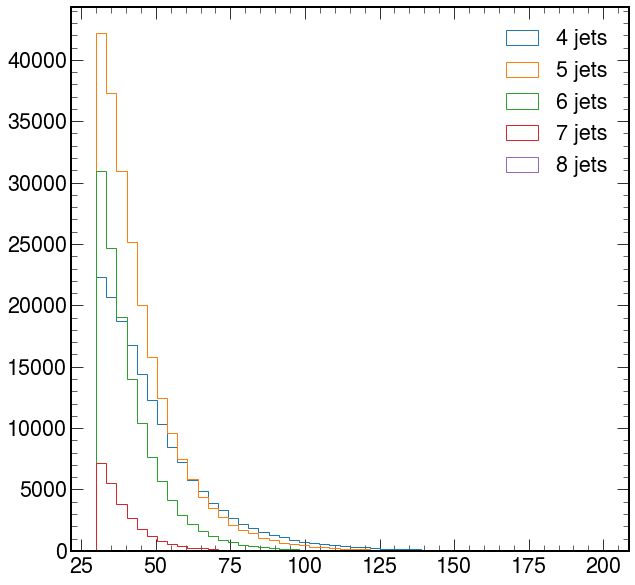

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


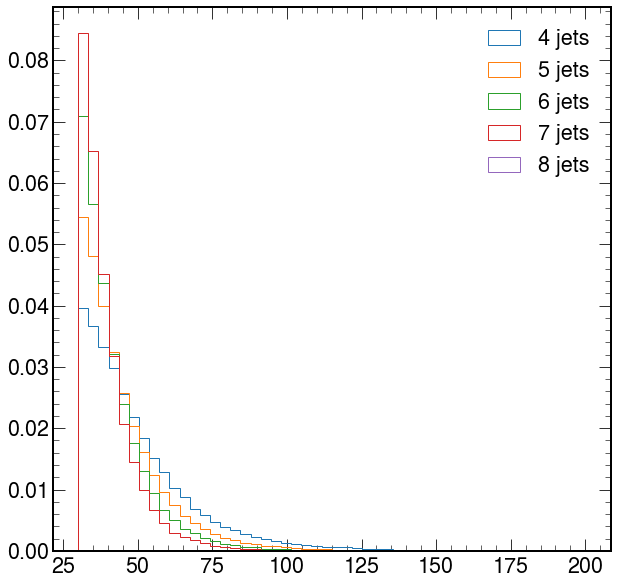

In [17]:
jets_matched = jets[jets.matched == True]


labels = []
for n in range(4,9):
    b = jets_matched[ak.num(jets_matched) == n]
    plt.hist(b[0:,-1].pt, histtype="step", bins=50, range=(30,200))
    labels.append(str(n)+" jets")

plt.legend(labels)
plt.show()

# normalise
labels = []
for n in range(4,9):
    b = jets_matched[ak.num(jets_matched) == n]
    plt.hist(b[0:,-1].pt, histtype="step", bins=50, range=(30,200), density=True)
    labels.append(str(n)+" jets")

plt.legend(labels)
plt.show()

# Parton matching

In [359]:
jets = ak.with_name(jets, name="Momentum4D")
parton = ak.with_name(parton, name="Momentum4D")

In [7]:
jets

<MomentumArray4D [[{pt: 68.3, eta: 0.853, ... prov: -1}]] type='584143 * var * M...'>

In [12]:
m = (jets[:,0] + jets[:,1]).mass

(array([1.4425e+04, 6.8733e+04, 9.2217e+04, 8.2386e+04, 7.3719e+04,
        5.8588e+04, 4.5003e+04, 3.3959e+04, 2.5240e+04, 1.9103e+04,
        1.4616e+04, 1.1318e+04, 8.7290e+03, 6.6660e+03, 5.3470e+03,
        4.2810e+03, 3.4510e+03, 2.7010e+03, 2.2720e+03, 1.8190e+03,
        1.4440e+03, 1.2210e+03, 1.0250e+03, 8.6300e+02, 7.2700e+02,
        6.1000e+02, 5.2000e+02, 4.5900e+02, 3.4300e+02, 2.8900e+02,
        2.6600e+02, 2.1500e+02, 2.1100e+02, 1.7900e+02, 1.4800e+02,
        1.4100e+02, 1.3700e+02, 9.4000e+01, 8.3000e+01, 7.2000e+01,
        7.0000e+01, 6.0000e+01, 4.5000e+01, 5.1000e+01, 4.2000e+01,
        4.0000e+01, 1.7000e+01, 1.7000e+01, 2.0000e+01, 1.4000e+01,
        1.9000e+01, 8.0000e+00, 1.5000e+01, 1.6000e+01, 7.0000e+00,
        8.0000e+00, 8.0000e+00, 6.0000e+00, 4.0000e+00, 7.0000e+00,
        8.0000e+00, 5.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

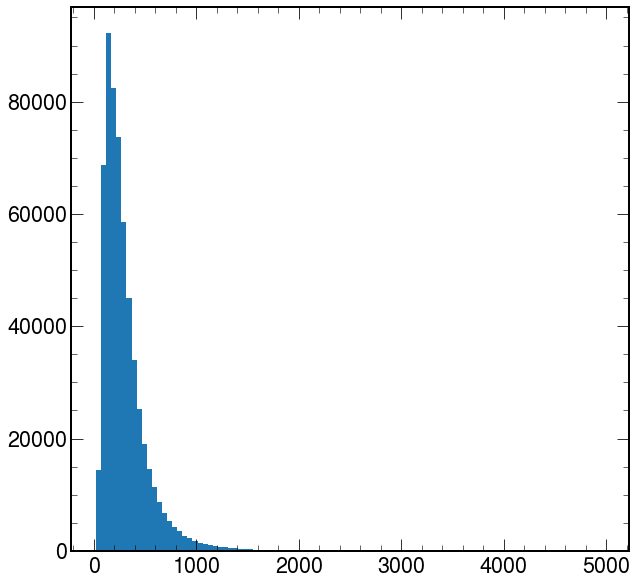

In [14]:
plt.hist(m, bins=100)

- jets coming from the higgs and plot the invariant mass
- build the higgs candidate: 
   - mass, pt , eta, phi
   - mass, pt eta phi but in categories on total number of jets
   
- build the W hadronically decaying candidate:
   same as higgs
   
- build the top hadronically decaying candidate
   same as the higgs
   
 

## Higgs

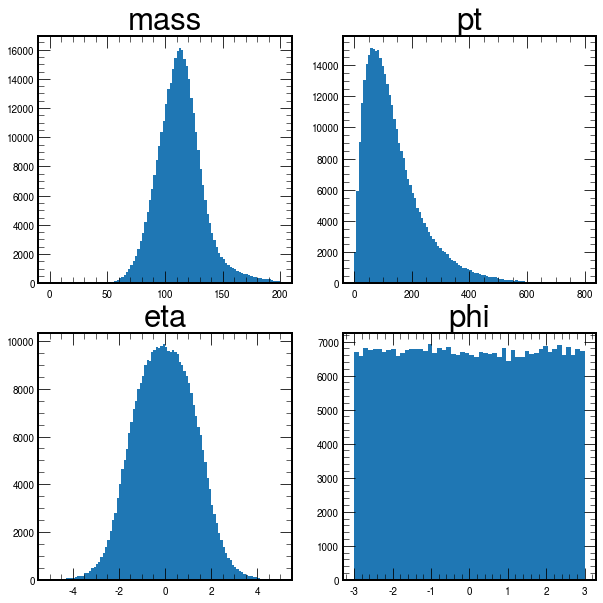

In [374]:
b_jets = jets[jets.prov == 1]
h_jets = b_jets[ak.num(b_jets) == 2]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist((h_jets[:,0] + h_jets[:,1]).mass, bins=100, range=(0,200))
axs[0, 0].set_title('mass')
axs[0, 1].hist((h_jets[:,0] + h_jets[:,1]).pt, bins=100, range=(0,800))
axs[0, 1].set_title('pt')
axs[1, 0].hist((h_jets[:,0] + h_jets[:,1]).eta, bins=100, range=(-5,5))
axs[1, 0].set_title('eta')
axs[1, 1].hist((h_jets[:,0] + h_jets[:,1]).phi, bins=50, range=(-3,3))
axs[1, 1].set_title('phi')

axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/h_hists.png", dpi=400)
plt.show()

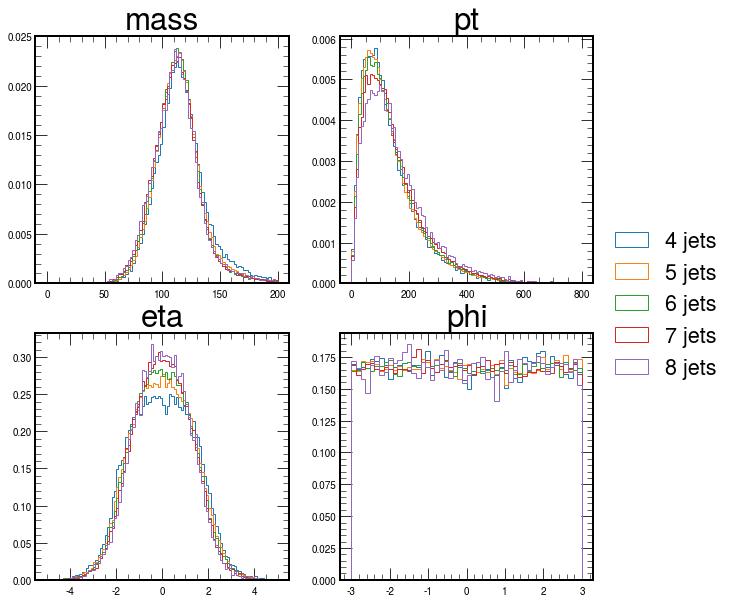

In [373]:
fig, axs = plt.subplots(2, 2)

labels = []
for n in range(4,9):
    subset = jets[ak.num(jets) == n]
    
    b_jets = subset[subset.prov == 1]
    h_jets = b_jets[ak.num(b_jets) == 2]

    axs[0, 0].hist((h_jets[:,0] + h_jets[:,1]).mass, bins=100, range=(0,200), density=True, histtype="step")
    axs[0, 1].hist((h_jets[:,0] + h_jets[:,1]).pt, bins=100, range=(0,800), density=True, histtype="step")
    axs[1, 0].hist((h_jets[:,0] + h_jets[:,1]).eta, bins=100, range=(-5,5), density=True, histtype="step")
    axs[1, 1].hist((h_jets[:,0] + h_jets[:,1]).phi, bins=50, range=(-3,3), density=True, histtype="step")
    
    labels.append(str(n)+" jets")

axs[0, 0].set_title('mass')
axs[0, 1].set_title('pt')
axs[1, 0].set_title('eta')
axs[1, 1].set_title('phi')
plt.legend(labels, bbox_to_anchor=(1, 1.5))
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/h_njets_hists.png", dpi=400)
plt.show()

## W boson

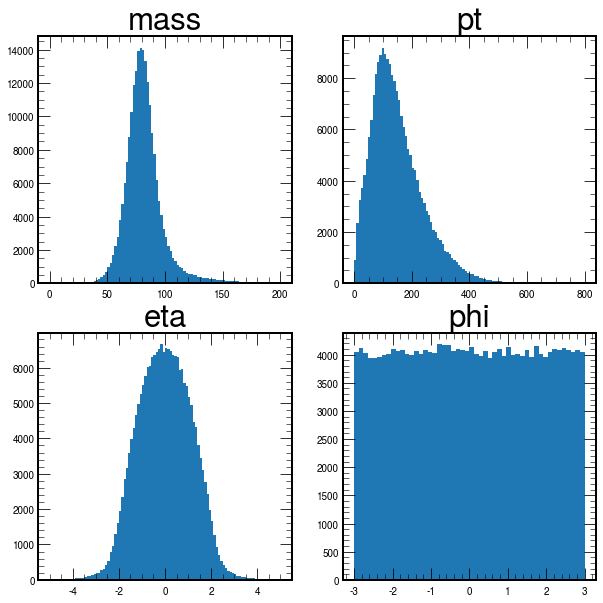

In [372]:
q_jets = jets[jets.prov == 5]
w_jets = q_jets[ak.num(q_jets) == 2]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist((w_jets[:,0] + w_jets[:,1]).mass, bins=100, range=(0,200))
axs[0, 0].set_title('mass')
axs[0, 1].hist((w_jets[:,0] + w_jets[:,1]).pt, bins=100, range=(0,800))
axs[0, 1].set_title('pt')
axs[1, 0].hist((w_jets[:,0] + w_jets[:,1]).eta, bins=100, range=(-5,5))
axs[1, 0].set_title('eta')
axs[1, 1].hist((w_jets[:,0] + w_jets[:,1]).phi, bins=50, range=(-3,3))
axs[1, 1].set_title('phi')
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/w_hists.png", dpi=400)

In [37]:
ak.num(jets)

<Array [5, 6, 4, 7, 4, 5, ... 5, 9, 5, 5, 6, 5] type='584143 * int64'>

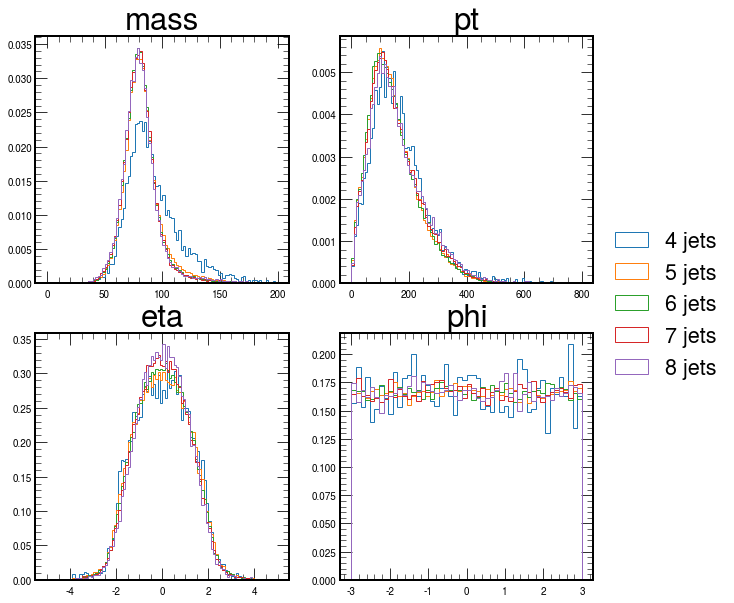

In [371]:
fig, axs = plt.subplots(2, 2)

labels = []
for n in range(4,9):
    subset = jets[ak.num(jets) == n]

    q_jets = subset[subset.prov == 5]
    w_jets = q_jets[ak.num(q_jets) == 2]
    
    axs[0, 0].hist((w_jets[:,0] + w_jets[:,1]).mass, bins=100, range=(0,200), density=True, histtype="step")
    axs[0, 1].hist((w_jets[:,0] + w_jets[:,1]).pt, bins=100, range=(0,800), density=True, histtype="step")
    axs[1, 0].hist((w_jets[:,0] + w_jets[:,1]).eta, bins=100, range=(-5,5), density=True, histtype="step")
    axs[1, 1].hist((w_jets[:,0] + w_jets[:,1]).phi, bins=50, range=(-3,3), density=True, histtype="step")
    
    labels.append(str(n)+" jets")

axs[0, 0].set_title('mass')
axs[0, 1].set_title('pt')
axs[1, 0].set_title('eta')
axs[1, 1].set_title('phi')
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.legend(labels, bbox_to_anchor=(1, 1.5))
plt.savefig("/eos/home-i02/y/ymaidann/w_njets_hists.png", dpi=400)
plt.show()

## Top quark

In [74]:
w_or_t_jets = jets[(jets.prov == 5)|(jets.prov == 2)]
w_or_t_jets = w_or_t_jets[ak.num(w_or_t_jets) == 3]
w_or_t_jets[0:10].prov.tolist()

[[5.0, 5.0, 2.0],
 [5.0, 5.0, 2.0],
 [5.0, 5.0, 2.0],
 [5.0, 2.0, 5.0],
 [5.0, 2.0, 5.0],
 [5.0, 2.0, 5.0],
 [5.0, 2.0, 5.0],
 [2.0, 5.0, 5.0],
 [2.0, 5.0, 5.0],
 [5.0, 5.0, 2.0]]

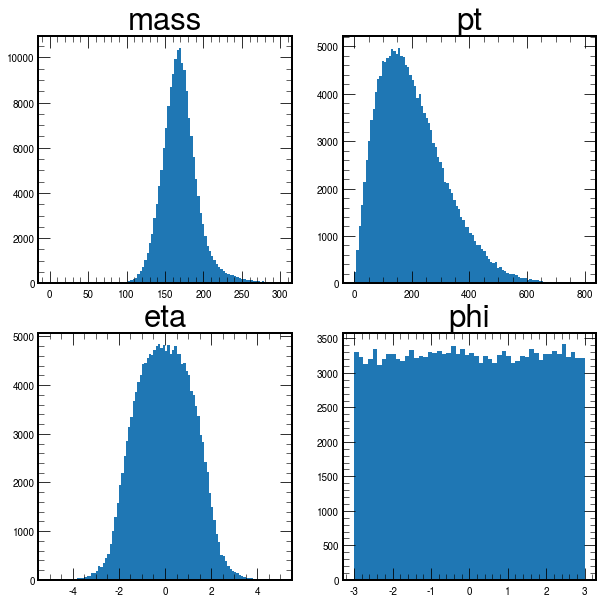

In [370]:
w_or_t_jets = jets[(jets.prov == 5)|(jets.prov == 2)]
w_or_t_jets = w_or_t_jets[ak.num(w_or_t_jets) == 3]

fig, axs = plt.subplots(2, 2)

t_mass = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).mass
t_pt = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).pt
t_eta = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).eta
t_phi = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).phi

axs[0, 0].hist(t_mass, bins=100, range=(0,300))
axs[0, 0].set_title('mass')
axs[0, 1].hist(t_pt, bins=100, range=(0,800))
axs[0, 1].set_title('pt')
axs[1, 0].hist(t_eta, bins=100, range=(-5,5))
axs[1, 0].set_title('eta')
axs[1, 1].hist(t_phi, bins=50, range=(-3,3))
axs[1, 1].set_title('phi')
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/t_hists.png", dpi=400)

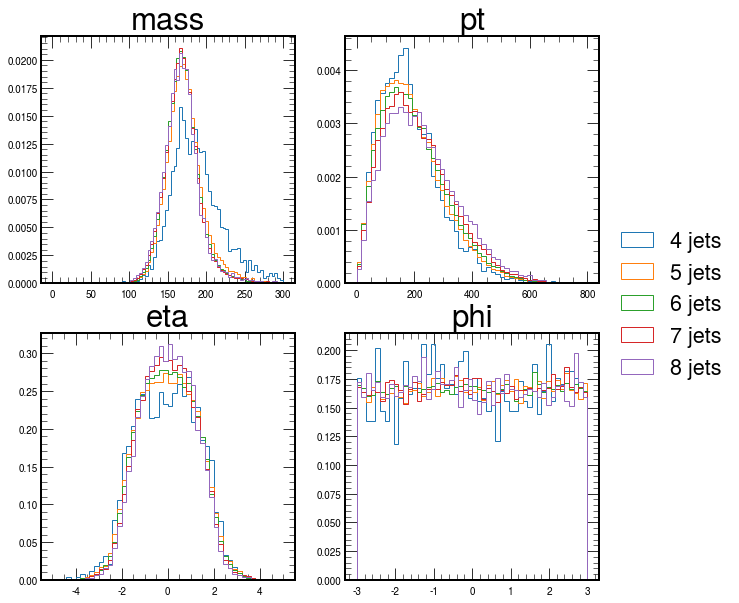

In [369]:
fig, axs = plt.subplots(2, 2)

labels = []
for n in range(4,9):
    subset = jets[ak.num(jets) == n]

    w_or_t_jets = subset[(subset.prov == 5)|(subset.prov == 2)]
    w_or_t_jets = w_or_t_jets[ak.num(w_or_t_jets) == 3]
    
    t_mass = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).mass
    t_pt = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).pt
    t_eta = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).eta
    t_phi = (w_or_t_jets[:,0] + w_or_t_jets[:,1] + w_or_t_jets[:,2]).phi

    axs[0, 0].hist(t_mass, bins=80, range=(0,300), density=True, histtype="step")
    axs[0, 1].hist(t_pt, bins=50, range=(0,800), density=True, histtype="step")
    axs[1, 0].hist(t_eta, bins=50, range=(-5,5), density=True, histtype="step")
    axs[1, 1].hist(t_phi, bins=50, range=(-3,3), density=True, histtype="step")
    
    labels.append(str(n)+" jets")

axs[0, 0].set_title('mass')
axs[0, 1].set_title('pt')
axs[1, 0].set_title('eta')
axs[1, 1].set_title('phi')
plt.legend(labels, bbox_to_anchor=(1, 1.5))
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/t_njets_hists.png", dpi=400)
plt.show()

In [92]:
t_mass = ak.sum(w_or_t_jets, axis=1)
t_mass

<Array [{pt: 350, eta: 5.33, ... prov: 12}] type='170478 * {"pt": float32, "eta"...'>

# Comparing jet quantities with parton quantities

In [16]:
parton[0].tolist()

[{'pt': 30.55859375,
  'eta': 0.030710220336914062,
  'phi': 0.386810302734375,
  'pdgId': 2.0,
  'prov': 4.0},
 {'pt': 73.28515625,
  'eta': 1.5042724609375,
  'phi': -0.48553466796875,
  'pdgId': 5.0,
  'prov': 3.0},
 {'pt': 78.609375,
  'eta': 0.844207763671875,
  'phi': 2.0606689453125,
  'pdgId': -5.0,
  'prov': 2.0},
 {'pt': 12.8798828125,
  'eta': -0.554443359375,
  'phi': -0.44775390625,
  'pdgId': 3.0,
  'prov': 5.0},
 {'pt': 40.845703125,
  'eta': 2.2071533203125,
  'phi': 0.055469512939453125,
  'pdgId': -4.0,
  'prov': 5.0},
 {'pt': 54.125,
  'eta': 0.16015625,
  'phi': 2.3828125,
  'pdgId': 5.0,
  'prov': 1.0},
 {'pt': 66.0,
  'eta': 1.17578125,
  'phi': -1.66796875,
  'pdgId': -5.0,
  'prov': 1.0}]

In [14]:
parton[3].tolist()

[{'pt': 402.296875,
  'eta': 1.5523681640625,
  'phi': -0.551361083984375,
  'pdgId': 21.0,
  'prov': 4.0},
 {'pt': 101.1015625,
  'eta': 1.162109375,
  'phi': 1.5809326171875,
  'pdgId': 5.0,
  'prov': 2.0},
 {'pt': 49.78125,
  'eta': 0.484375,
  'phi': -2.80517578125,
  'pdgId': -5.0,
  'prov': 3.0},
 {'pt': 42.216796875,
  'eta': 1.2127685546875,
  'phi': 2.2603759765625,
  'pdgId': -1.0,
  'prov': 5.0},
 {'pt': 56.73046875,
  'eta': 1.60272216796875,
  'phi': -2.1605224609375,
  'pdgId': 2.0,
  'prov': 5.0},
 {'pt': 54.375,
  'eta': 0.568359375,
  'phi': 2.5390625,
  'pdgId': 5.0,
  'prov': 1.0},
 {'pt': 68.5,
  'eta': 1.12109375,
  'phi': -0.21533203125,
  'pdgId': -5.0,
  'prov': 1.0}]

In [58]:
parton[3].tolist()

[{'pt': 402.296875,
  'eta': 1.5523681640625,
  'phi': -0.551361083984375,
  'pdgId': 21.0,
  'prov': 4.0},
 {'pt': 101.1015625,
  'eta': 1.162109375,
  'phi': 1.5809326171875,
  'pdgId': 5.0,
  'prov': 2.0},
 {'pt': 54.375,
  'eta': 0.568359375,
  'phi': 2.5390625,
  'pdgId': 5.0,
  'prov': 1.0},
 None,
 {'pt': 49.78125,
  'eta': 0.484375,
  'phi': -2.80517578125,
  'pdgId': -5.0,
  'prov': 3.0},
 {'pt': 68.5,
  'eta': 1.12109375,
  'phi': -0.21533203125,
  'pdgId': -5.0,
  'prov': 1.0},
 None]

In [59]:
jets[3].prov.tolist()

[4.0, 2.0, 1.0, -1.0, 3.0, 1.0, -1.0]

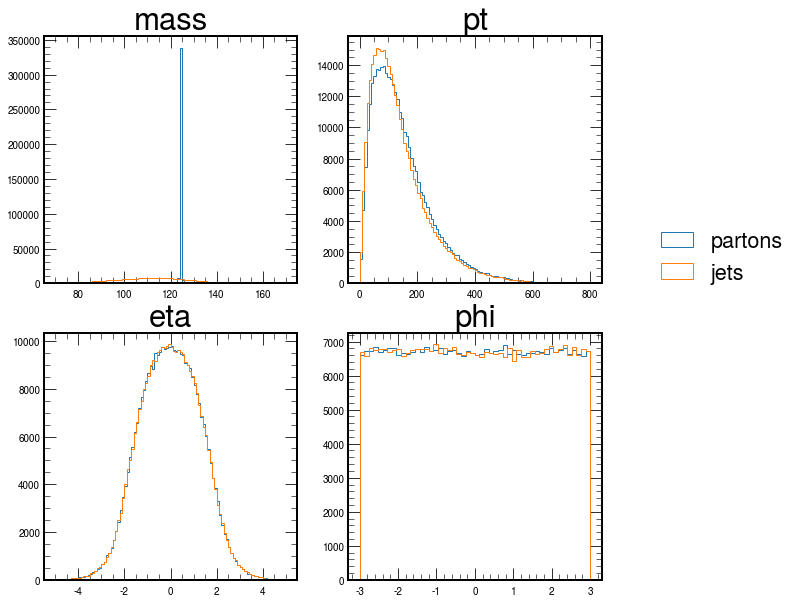

In [375]:
b_parton = parton[jets.prov == 1]
h_parton = b_parton[ak.num(b_parton) == 2]
h_parton["mass"] = 0

b_jets = jets[jets.prov == 1]
h_jets = b_jets[ak.num(b_jets) == 2]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist((h_parton[:,0] + h_parton[:,1]).mass, bins=100, range=(70,170), histtype="step", label = "partons")
axs[0, 0].hist((h_jets[:,0] + h_jets[:,1]).mass, bins=100, range=(70,170), histtype="step", label = "jets")
axs[0, 0].set_title('mass')
axs[0, 1].hist((h_parton[:,0] + h_parton[:,1]).pt, bins=100, range=(0,800), histtype="step", label = "partons")
axs[0, 1].hist((h_jets[:,0] + h_jets[:,1]).pt, bins=100, range=(0,800), histtype="step", label = "jets")
axs[0, 1].set_title('pt')
axs[1, 0].hist((h_parton[:,0] + h_parton[:,1]).eta, bins=100, range=(-5,5), histtype="step", label = "partons")
axs[1, 0].hist((h_jets[:,0] + h_jets[:,1]).eta, bins=100, range=(-5,5), histtype="step", label = "jets")
axs[1, 0].set_title('eta')
axs[1, 1].hist((h_parton[:,0] + h_parton[:,1]).phi, bins=50, range=(-3,3), histtype="step", label = "partons")
axs[1, 1].hist((h_jets[:,0] + h_jets[:,1]).phi, bins=50, range=(-3,3), histtype="step", label = "jets")
axs[1, 1].set_title('phi')

plt.legend(bbox_to_anchor=(1.8, 1.5))
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/h_parton_vs_jet_hists", dpi=400)
plt.show()

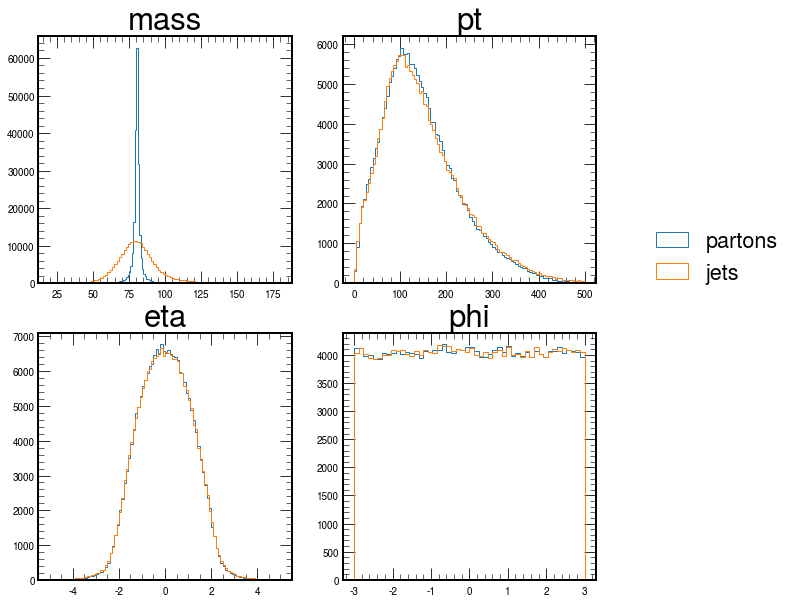

In [368]:
q_parton = parton[jets.prov == 5]
w_parton = q_parton[ak.num(q_parton) == 2]
w_parton["mass"] = 0

q_jets = jets[jets.prov == 5]
w_jets = q_jets[ak.num(q_jets) == 2]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist((w_parton[:,0] + w_parton[:,1]).mass, bins=100, range=(20,120), histtype="step", label = "partons")
axs[0, 0].hist((w_jets[:,0] + w_jets[:,1]).mass, bins=100, range=(20,180), histtype="step", label = "jets")
axs[0, 0].set_title('mass')
axs[0, 1].hist((w_parton[:,0] + w_parton[:,1]).pt, bins=100, range=(0,500), histtype="step", label = "partons")
axs[0, 1].hist((w_jets[:,0] + w_jets[:,1]).pt, bins=100, range=(0,500), histtype="step", label = "jets")
axs[0, 1].set_title('pt')
axs[1, 0].hist((w_parton[:,0] + w_parton[:,1]).eta, bins=100, range=(-5,5), histtype="step", label = "partons")
axs[1, 0].hist((w_jets[:,0] + w_jets[:,1]).eta, bins=100, range=(-5,5), histtype="step", label = "jets")
axs[1, 0].set_title('eta')
axs[1, 1].hist((w_parton[:,0] + w_parton[:,1]).phi, bins=50, range=(-3,3), histtype="step", label = "partons")
axs[1, 1].hist((w_jets[:,0] + w_jets[:,1]).phi, bins=50, range=(-3,3), histtype="step", label = "jets")
axs[1, 1].set_title('phi')

plt.legend(bbox_to_anchor=(1.8, 1.5))
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/w_parton_vs_jet_hists", dpi=400)
plt.show()

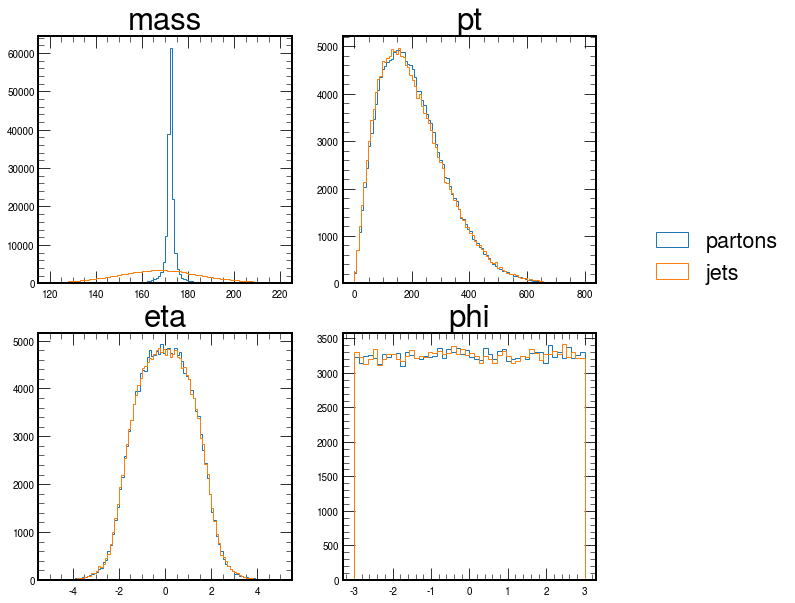

In [367]:
wt_parton = parton[(jets.prov == 5)|(jets.prov == 2)]
wt_parton = wt_parton[ak.num(wt_parton) == 3]
wt_parton["mass"] = 0

wt_jets = jets[(jets.prov == 5)|(jets.prov == 2)]
wt_jets = wt_jets[ak.num(wt_jets) == 3]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hist((wt_parton[:,0] + wt_parton[:,1] + wt_parton[:,2]).mass, bins=100, range=(120,220), histtype="step", label = "partons")
axs[0, 0].hist((wt_jets[:,0] + wt_jets[:,1] + wt_jets[:,2]).mass, bins=100, range=(120,220), histtype="step", label = "jets")
axs[0, 0].set_title('mass')
axs[0, 1].hist((wt_parton[:,0] + wt_parton[:,1] + wt_parton[:,2]).pt, bins=100, range=(0,800), histtype="step", label = "partons")
axs[0, 1].hist((wt_jets[:,0] + wt_jets[:,1] + wt_jets[:,2]).pt, bins=100, range=(0,800), histtype="step", label = "jets")
axs[0, 1].set_title('pt')
axs[1, 0].hist((wt_parton[:,0] + wt_parton[:,1] + wt_parton[:,2]).eta, bins=100, range=(-5,5), histtype="step", label = "partons")
axs[1, 0].hist((wt_jets[:,0] + wt_jets[:,1] + wt_jets[:,2]).eta, bins=100, range=(-5,5), histtype="step", label = "jets")
axs[1, 0].set_title('eta')
axs[1, 1].hist((wt_parton[:,0] + wt_parton[:,1] + wt_parton[:,2]).phi, bins=50, range=(-3,3), histtype="step", label = "partons")
axs[1, 1].hist((wt_jets[:,0] + wt_jets[:,1] + wt_jets[:,2]).phi, bins=50, range=(-3,3), histtype="step", label = "jets")
axs[1, 1].set_title('phi')

plt.legend(bbox_to_anchor=(1.8, 1.5))
axs[0,0].tick_params(labelsize=10)
axs[0,1].tick_params(labelsize=10)
axs[1,0].tick_params(labelsize=10)
axs[1,1].tick_params(labelsize=10)
plt.savefig("/eos/home-i02/y/ymaidann/t_parton_vs_jet_hists", dpi=400)
plt.show()

# 2D histograms for partons vs jets

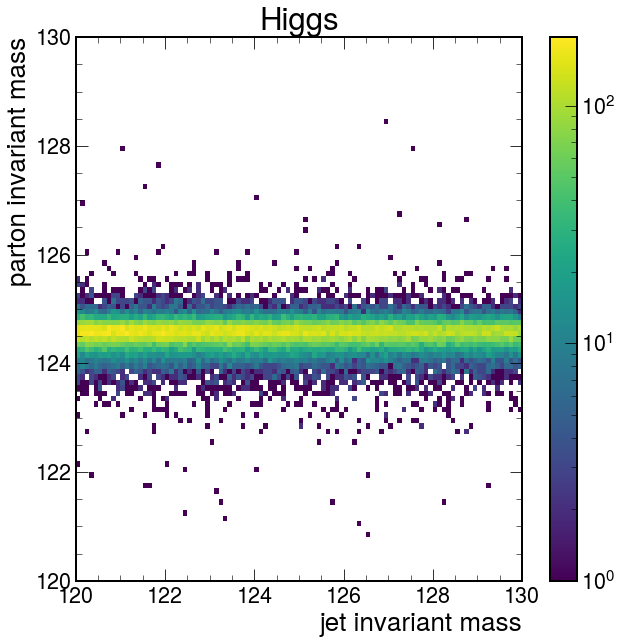

In [340]:
plt.hist2d((h_jets[:,0] + h_jets[:,1]).mass,
           (h_parton[:,0] + h_parton[:,1]).mass, bins=100, range=([[120, 130], [120, 130]]), norm=LogNorm())
plt.xlabel("jet invariant mass")
plt.ylabel("parton invariant mass")
plt.title("Higgs")
plt.colorbar()
plt.savefig("/eos/home-i02/y/ymaidann/h_parton_vs_jet_inv_mass.png", dpi=400)
plt.show()

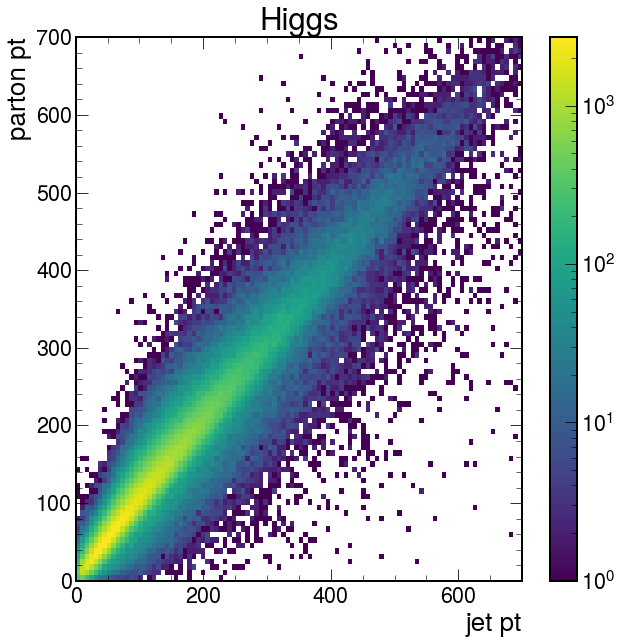

In [339]:
plt.hist2d((h_jets[:,0] + h_jets[:,1]).pt,
           (h_parton[:,0] + h_parton[:,1]).pt, bins=100, range=([[0, 700], [0, 700]]), norm=LogNorm())
plt.xlabel("jet pt")
plt.ylabel("parton pt")
plt.title("Higgs")
plt.colorbar()
plt.savefig("/eos/home-i02/y/ymaidann/h_parton_vs_jet_pt.png", dpi=400)
plt.show()

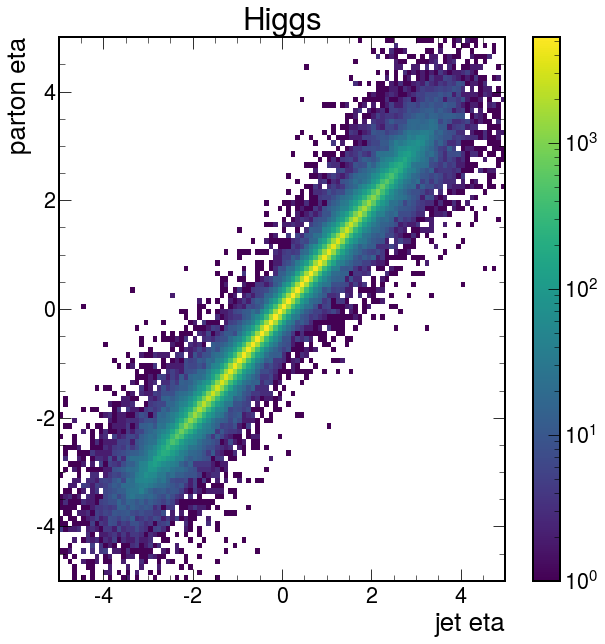

In [338]:
plt.hist2d((h_jets[:,0] + h_jets[:,1]).eta,
           (h_parton[:,0] + h_parton[:,1]).eta, bins=100, range=([[-5, 5], [-5, 5]]), norm=LogNorm())
plt.xlabel("jet eta")
plt.ylabel("parton eta")
plt.title("Higgs")
plt.colorbar()
plt.savefig("/eos/home-i02/y/ymaidann/h_parton_vs_jet_eta.png", dpi=400)
plt.show()

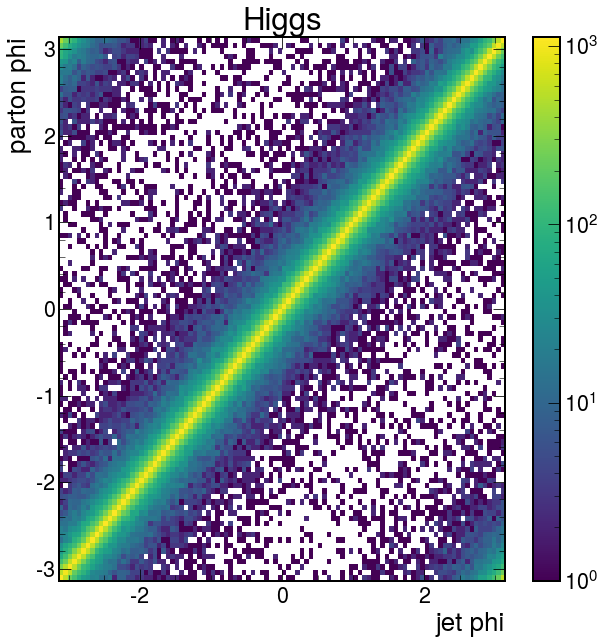

In [337]:
plt.hist2d((h_jets[:,0] + h_jets[:,1]).phi,
           (h_parton[:,0] + h_parton[:,1]).phi, bins=100, range=([[-3.14, 3.14], [-3.14, 3.14]]), norm=LogNorm())
plt.xlabel("jet phi")
plt.ylabel("parton phi")
plt.title("Higgs")
plt.colorbar()
plt.savefig("/eos/home-i02/y/ymaidann/h_parton_vs_jet_phi.png", dpi=400)
plt.show()

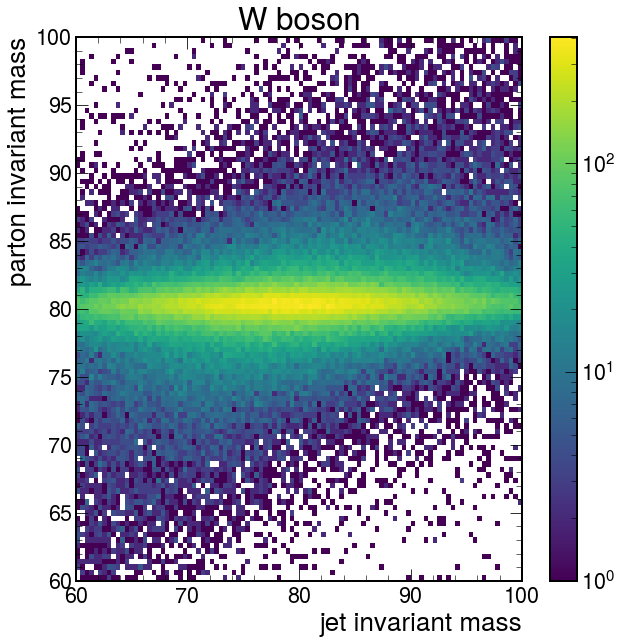

In [336]:
q_parton = parton[jets.prov == 5]
w_parton = q_parton[ak.num(q_parton) == 2]
w_parton["mass"] = 0

q_jets = jets[jets.prov == 5]
w_jets = q_jets[ak.num(q_jets) == 2]

plt.hist2d((w_jets[:,0] + w_jets[:,1]).mass,
           (w_parton[:,0] + w_parton[:,1]).mass, bins=100, norm=LogNorm(), range=([[60,100],[60,100]]))
plt.xlabel("jet invariant mass")
plt.ylabel("parton invariant mass")
plt.title("W boson")
plt.colorbar()
plt.savefig("/eos/home-i02/y/ymaidann/w_parton_vs_jet_inv_mass.png", dpi=400)
plt.show()

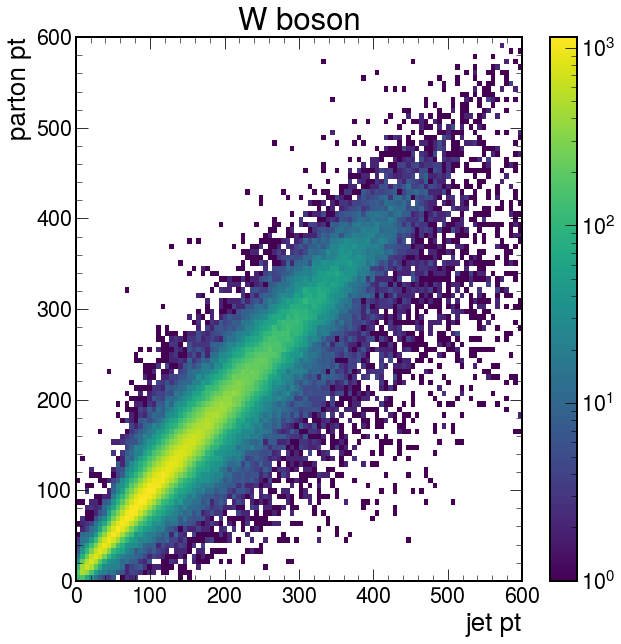

In [335]:
q_parton = parton[jets.prov == 5]
w_parton = q_parton[ak.num(q_parton) == 2]
w_parton["mass"] = 0

q_jets = jets[jets.prov == 5]
w_jets = q_jets[ak.num(q_jets) == 2]

plt.hist2d((w_jets[:,0] + w_jets[:,1]).pt,
           (w_parton[:,0] + w_parton[:,1]).pt, bins=100, norm=LogNorm(), range=([[0,600],[0,600]]))
plt.xlabel("jet pt")
plt.ylabel("parton pt")
plt.title("W boson")
plt.colorbar()
plt.savefig("/eos/home-i02/y/ymaidann/w_parton_vs_jet_pt.png", dpi=400)
plt.show()

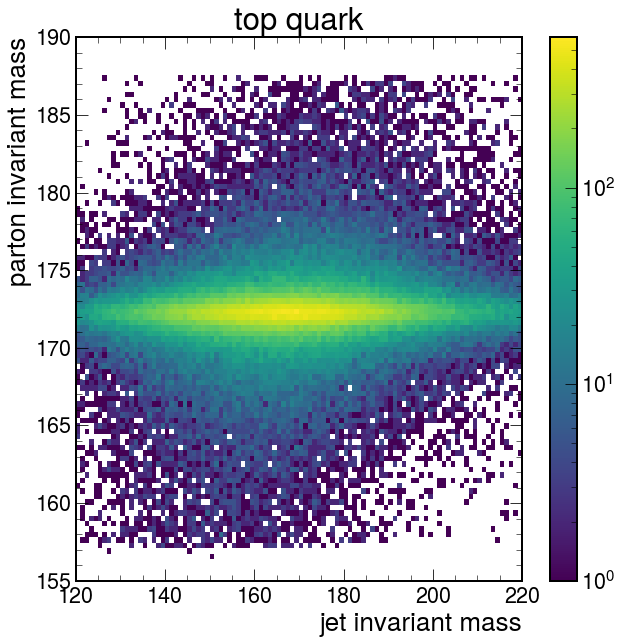

In [334]:
wt_parton = parton[(jets.prov == 5)|(jets.prov == 2)]
wt_parton = wt_parton[ak.num(wt_parton) == 3]
wt_parton["mass"] = 0

wt_jets = jets[(jets.prov == 5)|(jets.prov == 2)]
wt_jets = wt_jets[ak.num(wt_jets) == 3]

plt.hist2d((wt_jets[:,0] + wt_jets[:,1] + wt_jets[:,2]).mass,
           (wt_parton[:,0] + wt_parton[:,1] + wt_parton[:,2]).mass, bins=100, norm=LogNorm(), range=([[120,220],[155,190]]))
plt.xlabel("jet invariant mass")
plt.ylabel("parton invariant mass")
plt.title("top quark")
plt.colorbar()
plt.savefig("/eos/home-i02/y/ymaidann/t_parton_vs_jet_inv_mass.png", dpi=400)
plt.show()

# Single jet vs single parton

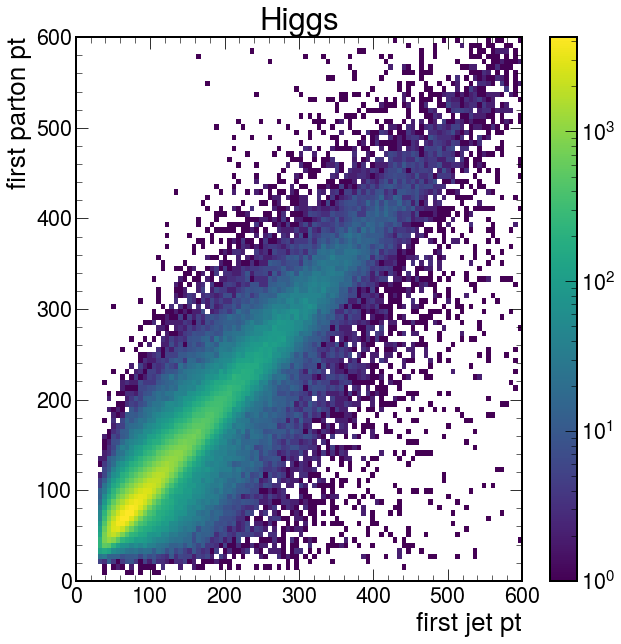

In [296]:
plt.hist2d(h_jets[:,0].pt, h_parton[:,0].pt, bins=100, range=([[0, 600], [0, 600]]), norm=LogNorm())
plt.xlabel("first jet pt")
plt.ylabel("first parton pt")
plt.title("Higgs")
plt.colorbar()
plt.show()

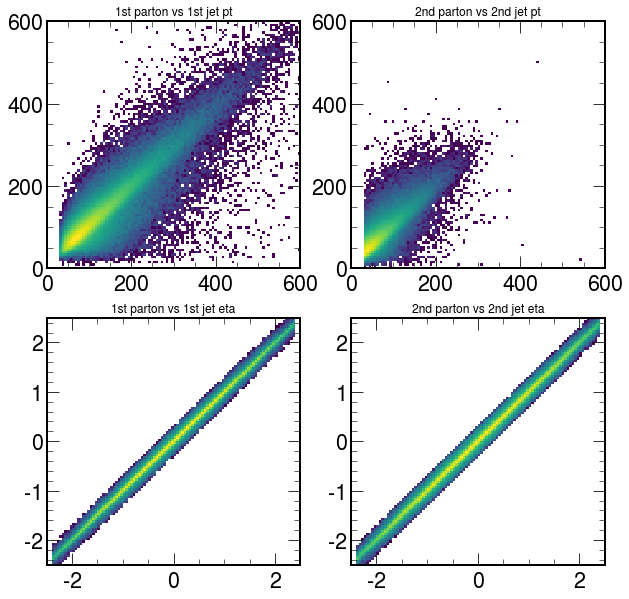

In [333]:
fig, axs = plt.subplots(2, 2)
axs[0,0].hist2d(h_jets[:,0].pt, h_parton[:,0].pt, bins=100, range=([[0, 600], [0, 600]]), norm=LogNorm())
axs[0,1].hist2d(h_jets[:,1].pt, h_parton[:,1].pt, bins=100, range=([[0, 600], [0, 600]]), norm=LogNorm())

axs[0,0].set_title("1st parton vs 1st jet pt", fontsize=12)
axs[0,1].set_title("2nd parton vs 2nd jet pt", fontsize=12)

axs[1,0].hist2d(h_jets[:,0].eta, h_parton[:,0].eta, bins=100, range=([[-2.5, 2.5], [-2.5, 2.5]]), norm=LogNorm())
axs[1,1].hist2d(h_jets[:,1].eta, h_parton[:,1].eta, bins=100, range=([[-2.5, 2.5], [-2.5, 2.5]]), norm=LogNorm())

axs[1,0].set_title("1st parton vs 1st jet eta", fontsize=12)
axs[1,1].set_title("2nd parton vs 2nd jet eta", fontsize=12)

plt.savefig("/eos/home-i02/y/ymaidann/h_single_parton_vs_single_jet.png", dpi=400)
plt.show()

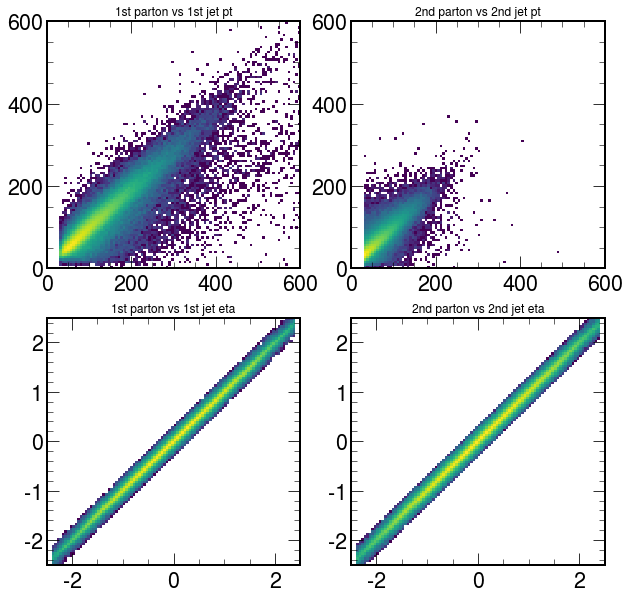

In [332]:
fig, axs = plt.subplots(2, 2)
axs[0,0].hist2d(w_jets[:,0].pt, w_parton[:,0].pt, bins=100, range=([[0, 600], [0, 600]]), norm=LogNorm())
axs[0,1].hist2d(w_jets[:,1].pt, w_parton[:,1].pt, bins=100, range=([[0, 600], [0, 600]]), norm=LogNorm())

axs[0,0].set_title("1st parton vs 1st jet pt", fontsize=12)
axs[0,1].set_title("2nd parton vs 2nd jet pt", fontsize=12)

axs[1,0].hist2d(w_jets[:,0].eta, w_parton[:,0].eta, bins=100, range=([[-2.5, 2.5], [-2.5, 2.5]]), norm=LogNorm())
axs[1,1].hist2d(w_jets[:,1].eta, w_parton[:,1].eta, bins=100, range=([[-2.5, 2.5], [-2.5, 2.5]]), norm=LogNorm())

axs[1,0].set_title("1st parton vs 1st jet eta", fontsize=12)
axs[1,1].set_title("2nd parton vs 2nd jet eta", fontsize=12)

plt.savefig("/eos/home-i02/y/ymaidann/w_single_parton_vs_single_jet.png", dpi=400)
plt.show()

In [328]:
import os
cwd = os.getcwd()

In [329]:
cwd

'/eos/home-i02/y/ymaidann/eth_project/PocketCoffea/notebooks/JetTagging'